# 선형모델
- kNN이 이해하기 쉽지만 예측이 느리고 많은 특성을 처리하는 능력이 부족해서 현업에서는 잘 사용하지 않는다.
- 이런 단점이 없는 알고리즘이 선형모델(linear model)이다.
- 선형모델은 입력특성에 대한 선형함수를 만들어 예측을 수행한다.
- 회귀(regression)의 경우 선형 모델을 위한 일반화된 예측함수는 다음과 같다.
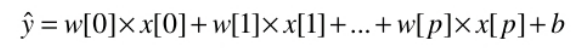
- 이식에서 x[0]부터 x[p]까지는 하나의 데이터포인트에 대한 특성을 나타내며 (zerobase니 특성의 개수는 p+1)
- w와 b는 모델이 학습할 파라미터이다.
    - 머신러닝에서 알고리즘이 주어진 데이터로부터 학습하는 파라미터를 모델 파라미터(=파라미터, 계수)
    - 반대로 모델이 학습할 수 없어서 사람이 직접 설정해 주어야하는 파라미터를 하이퍼파라미터(hyperpraameter)라고 한다.
    - 이런 하이퍼파라미터는 파이썬 클래스와 함수에 넘겨주는 인수에 포함되므로 통칭하여 매개변수라고 앞으로 부르겠다.
- y햇 은 모들에 만들어낸 예측값이다.
- 특성이 하나인 데이터 셋이라면 이식은 다음과 같다.
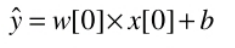
- 특성이 많아지면 w는 각 특성에 해당하는 기울기를 모두 가지게 된다.
- 다르게 생각하면 예측값은 입력 특성에 w(가중치)를 곱해서 더한 가중치의 합으로 볼 수 있다.



In [2]:
#윈도우 os
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

w[0]: 0.393906  b: -0.031804


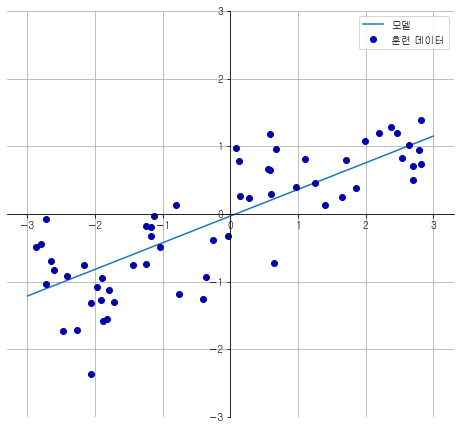

In [7]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

mglearn.plots.plot_linear_regression_wave()


- 회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면(x,y,z)이 되며, 더 높은 차원(특성이 더 많음)에서는  
초평면(hyperplane)이 되는 회귀모델 특징을 가지고 있다.
- 이 직선과 KNeighborsRegressor를 사용하여 만든 것과 비교해보면 직선을 사용한 예측이 더 제약이 많아보인다.
- 즉, 데이터의 상세 정보를 모두 잃어버린(너무 general)것 처럼 보인다.
- 타깃y가 특성들의 선형 조합이라는 것은 때론 너무 비현실적인 가정이다.
- 하지만 1차원 데이터만(성질 한개)만 놓고 봐서 생긴 편견일 수 있다.
- 특성이 많은 데이터 셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있다.
- 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃y도 완벽하게 **(훈련세트에 대해서만임)** 선형함수로 모델링 가능함
    - 미지수의 수보다 식의수가 더 많기 때문에.

# 선형 회귀(최소제곱법)
- 회귀를 위한 선형 모델은 다양하다. 이 모델들은 훈련데이터로부터 모델 파라미터 **w와b**를 학습하는 방법과 **모델의 복잡도**를 제어하는 방법에서 차이가 난다.

- 선형 회귀(linear regression) 또는 최소제곱법(OLS, ordinary least squares)은 가장 간단하고 오래된 회귀용 선형 알고리즘.
- 선형회귀(최소제곱법)은 예측(y햇)과 훈련 세트에 있는 타깃y(정답)사이의 평균제곱오차(mean squared error)을 최소화하는 파라미터 w와 b를 찾는다.
- 평균제곱오차
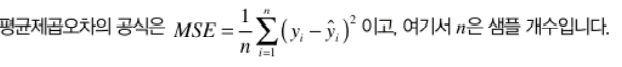
- 선형 회기는 매개변수가 없는것(=하이퍼파라미터 튜닝과정이 없음)이 장점이지만, 그래서 **모델의 복잡도를 제어할 방법도 없다.**



In [11]:
from sklearn.linear_model import LinearRegression
#훈련세트 + 테스트세트 전체
X, y = mglearn.datasets.make_wave(n_samples=60) #60개의 행, 특성은 1개임.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#앞서 KNN에서 분류 KNeighborsClassifier, 회귀KNeighborsRegressor에서는 
#이웃수(모델로학습시키는게 아니라 사용자가 정하는거 = 하이퍼파리미터 = 매개변수)를 매개변수로 지정하여 객체를 만든 후에
#knn,fit(X_train, y_train)을 해서 학습시킴.

#선형회귀(최소제곱법)에서는 매개변수(하이퍼파리미터)가 필요없음. 객체 생성과 동시에 훈련시켜서 
#모델의 파라미터 w와 b를 구한다.

lr = LinearRegression().fit(X_train, y_train) #LinearRegression의 매개변수 없음.

#기울기 파리미터(w)는 가중치(weight) 또는 계수(coefficient)라고 하며 lr 객체의 coef_ 속성에 저장되어 있고
#편향(offset) 또는 절편(intercept)파라미터 (b)는 intercept_속성에 저장되어있다.

print("lr.coef_" ,lr.coef_)
print("lr.intercept_", lr.intercept_)

#scikit-learn은 훈련데이터에서 유도된 속성(모델파라미터)은 항상 끝에 밎줄을 붙인다. 
#(사용자가 지정한 매개변수(하이퍼 파리미터)와 구분하기 위함)

#intercept_ 속성은 항상 실수값 하나이지만
#coef_ 속성은 각 입력 특성에 하나씩 대응되는 numpy 배열이다. (데이터의 수가 아니라 특성 수)
#위의 예시는 특성이하나이기 때문에 lr.coef_도 하나의 값을 가진다. 

lr.coef_ [0.39390555]
lr.intercept_ -0.031804343026759746


In [14]:
# 성능확인 
print("훈련세트점수 : {:.2f}".format(lr.score(X_train,y_train)))
print("테스트세트점수 : {:.2f}".format(lr.score(X_test, y_test)))

#특성의 수가 데이터 행의개수보다 많다면 식의 수가 더 많기에 '훈련세트'에 대해서 정확도 1


훈련세트점수 : 0.67
테스트세트점수 : 0.66


- R제곱 값이 0.66은 별로 좋은 값도 아니고, 훈련과 테스트세트 차이가 별로 안남
- 모델이 너무 일반화된것 각 특성을 반영하지 못한 것 (일차함수꼴이니 당연함)
- 즉 과소적합(underfitting)인 상태
- 1차원 데이터 셋(열이 하나)에서는 모델이 매우 단순(직선)이므로 과대적합을 걱정할 필요가 없다.

- 특성이 많은 고차원 데이터 셋에서는 '훈련 세트'에 대한 성능이 매우 높아져 과대적합 될 가능성이 높다 (미지수와 식의 개수가 비슷해질 수록)
- 하지만 테스트 세트에 대해서 정확도는 떨어지는 과대적합이 될 가능성이 높다.


In [15]:
# 보스턴 집값 데이터 셋: 고차원 데이터셋, 선형회귀에서는 과대적합 가능성있음.
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train, y_train) #fit 함수는 자기자신의 객체를 반환해서 선언과 동시에 사용가능함.


C:\Users\khsls\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [16]:
print("훈련 세트 점수 {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 {:.2f}".format(lr.score(X_test,y_test)))

훈련 세트 점수 0.95
테스트 세트 점수 0.61


- **훈련데이터와 테스트데이터 사이의 이런 성능차이는 과대적합이 되었다는 확실한 신호**

- 선형 모델 중 모델의 복잡도를 제어할 수 있는 모델을 사용해야한다!